<a href="https://colab.research.google.com/github/pranavkakkad/Song-Identification/blob/master/GTZAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import librosa 
import IPython.display as play
import os
import matplotlib.pyplot as plt
import librosa.display
from PIL import Image
import scipy
import seaborn as sns
from sklearn import preprocessing

In [ ]:
# feature_3 = pd.read_csv("/content/drive/MyDrive/Data/features_3_sec.csv")

In [ ]:
# feature_3.shape

In [ ]:
# feature_3.head(20)

In [ ]:
feature_30 = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")

In [ ]:
feature_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
feature_30.shape

(1000, 60)

#Test cases


In [ ]:
#loading song
file_path = "/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav"
x,sr  = librosa.load(file_path)
print(x)
print(sr)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
22050


In [ ]:
#playing song in notebook 
play.Audio(file_path)

In [ ]:
# #rms feature
# y, sr = librosa.load(file_path)
# librosa.feature.rms(y=y).reshape(1,-1).shape

#Understanding the audio:

In [ ]:
print("x ", x)
print("Shape of x", x.shape)
print("we are using the default sample rate")
print("sample rate:(KHz)", sr)
print("shape of x is created by multiplying sample rate with lenght of audio")
print("We have 30s second with sample rate of 22050")
print("length of x from sample rate and time:",sr*30)
print("They are very near to each other")

x  [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Shape of x (661794,)
we are using the default sample rate
sample rate:(KHz) 22050
shape of x is created by multiplying sample rate with lenght of audio
We have 30s second with sample rate of 22050
length of x from sample rate and time: 661500
They are very near to each other


In [ ]:
#To remove unnecessary audio that is silence from start as well as end
yt, index = librosa.effects.trim(x)
print("shape of trimmed song:", yt.shape)

shape of trimmed song: (661794,)


In [ ]:
def spectral_centroid(file_path):
  centroid = librosa.feature.spectral_centroid(x)[0]
  # returns array
  return centroid,np.mean(centroid),np.std(centroid)

def rms_energy(x):
  rms_e = librosa.feature.rms(x)
  return rms_e,np.mean(rms_e),np.std(rms_e)

def spectral_rolloff(x):
  sprec_roll = librosa.feature.spectral_rolloff(x, roll_percent = 0.85)
  return sprec_roll,np.mean(sprec_roll),np.std(sprec_roll)

#Not sure
# def spectral_contrast():

def spectral_bandwidth(x):
  #return array
  spec_band = librosa.feature.spectral_bandwidth(x, p=2)
  return spec_band,np.mean(spec_band),np.std(spec_band)


def zero_crossing_rate(x):
  #needs to check output type
  zcr =  librosa.feature.zero_crossing_rate(x)
  # print(np.mean(zc))
  return zcr,np.mean(zcr),np.std(zcr)

def mfccs(x):
  mfccs = librosa.feature.mfcc(x, n_mfcc=20)
  return mfccs, np.mean(mfccs,axis=1),np.std(mfccs,axis =1)


def chroma_features(x):
  #return pitch in sound
  chroma_d = librosa.feature.chroma_stft(x)
  return chroma_d, np.mean(chroma_d,axis=1),np.std(chroma_d,axis=1)

def save_spectrogram(file_path):
  #convert audio to image and saves it
  #returns null
  pass

In [ ]:
spectral_centroid(x)

(array([2175.02383311, 2103.86997851, 1955.28567059, ..., 1490.45683883,
        1506.97560349, 1442.6452166 ]), 1784.1658498652125, 360.2416750108329)

In [ ]:
mean_feature_dataframe = pd.DataFrame()
feature_dataframe = pd.DataFrame()

In [ ]:
mean_feature_dataframe.head()

""


In [ ]:
audio_directory = "/content/drive/MyDrive/Data/genres_original/"
total_songs = 0
feature_dict = {}
count = 0
error_files=[]

for subdir, dirs, files in os.walk(audio_directory):
    label_genre = subdir.split("/")[-1]
    count = 0
    song_arr_dict={}
    song_dict = {}
    for file in files:
      print(file)
      try:
        x,sr = librosa.load(subdir+"/"+file)
        song_arr_dict["name"]= song_dict["name"] = label_genre+"_"+str(count)
        song_arr_dict["mean"]=song_dict["mean"] = np.mean(abs(x))
        song_arr_dict["std"]=song_dict["std"] = np.std(x)
        song_arr_dict["skewness"]=song_dict["skewness"] = scipy.stats.skew(abs(x))
        song_arr_dict["kurtosis"] = song_dict["kurtosis"] = scipy.stats.kurtosis(x)
        spec_cent,me,stand_dev = spectral_centroid(x)
        song_dict["spectral_centroid"] = spec_cent
        song_arr_dict["spectral_centroid_mean"] = me
        song_arr_dict["spectral_centroid_std"] = stand_dev
        rms,me,stand_dev = rms_energy(x)
        song_dict["rmse"] = rms
        song_arr_dict["rmse_mean"] = me
        song_arr_dict["rmse_std"] = stand_dev
        spec_roll,me,stand_dev = spectral_rolloff(x)
        song_dict["spectral_rolloff"] = spec_roll
        song_arr_dict["spectral_rolloff_mean"] = me
        song_arr_dict["spectral_rolloff_std"] = stand_dev
        spec_band,me,stand_dev = spectral_bandwidth(x)
        song_dict["spectral_bandwidth"] = spec_band[0]
        song_arr_dict["spectral_bandwidth_mean"] = me
        song_arr_dict["spectral_bandwidth_std"] = stand_dev
        cross_rate,me,stand_dev = zero_crossing_rate(x)
        song_dict["zero_crossing_rate"] = cross_rate
        song_arr_dict["zero_crossing_rate_mean"] = me
        song_arr_dict["zero_crossing_rate"] = stand_dev
        mfcc,me,stand_dev = mfccs(x)
        for i in range(mfcc.shape[0]):
          song_dict["mfcc_"+str(i)] = mfcc[i]
          song_arr_dict["mfcc_mean_"+str(i)] = me[i]
          song_arr_dict["mfcc_std_"+str(i)] = me[i]
        chroma,me,stand_dev = chroma_features(x)
        for i in range(chroma.shape[0]):
          song_dict["chroma_stft_"+str(i)] = chroma[i]
          song_arr_dict["chroma_stft_mean_"+str(i)] = me[i]
          song_arr_dict["chroma_stft_std_"+str(i)] = stand_dev[i]
        mean_feature_dataframe = mean_feature_dataframe.append(song_arr_dict,ignore_index=True)
        feature_dataframe = feature_dataframe.append(song_dict,ignore_index=True)
      except:
        print("error in file")
        error_files.append(file)
        continue
      total_songs+=1
      count+=1 

rock.00004.wav
rock.00006.wav
rock.00008.wav
rock.00003.wav
rock.00002.wav
rock.00005.wav
rock.00007.wav
rock.00000.wav
rock.00001.wav
rock.00009.wav
rock.00019.wav
rock.00017.wav
rock.00011.wav
rock.00015.wav
rock.00013.wav
rock.00020.wav
rock.00018.wav
rock.00010.wav
rock.00012.wav
rock.00016.wav
rock.00014.wav
rock.00023.wav
rock.00025.wav
rock.00024.wav
rock.00022.wav
rock.00026.wav
rock.00030.wav
rock.00031.wav
rock.00032.wav
rock.00027.wav
rock.00029.wav
rock.00021.wav
rock.00033.wav
rock.00028.wav
rock.00046.wav
rock.00037.wav
rock.00035.wav
rock.00038.wav
rock.00034.wav
rock.00036.wav
rock.00043.wav
rock.00044.wav
rock.00041.wav
rock.00047.wav
rock.00039.wav
rock.00042.wav
rock.00045.wav
rock.00040.wav
rock.00049.wav
rock.00056.wav
rock.00055.wav
rock.00052.wav
rock.00054.wav
rock.00051.wav
rock.00048.wav
rock.00060.wav
rock.00057.wav
rock.00058.wav
rock.00050.wav
rock.00053.wav
rock.00059.wav
rock.00069.wav
rock.00063.wav
rock.00065.wav
rock.00064.wav
rock.00071.wav
rock.00067

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


error in file
jazz.00044.wav
jazz.00050.wav
jazz.00047.wav
jazz.00055.wav
jazz.00056.wav
jazz.00057.wav
jazz.00051.wav
jazz.00045.wav
jazz.00052.wav
jazz.00049.wav
jazz.00053.wav
jazz.00048.wav
jazz.00046.wav
jazz.00061.wav
jazz.00069.wav
jazz.00064.wav
jazz.00062.wav
jazz.00068.wav
jazz.00060.wav
jazz.00063.wav
jazz.00066.wav
jazz.00065.wav
jazz.00059.wav
jazz.00067.wav
jazz.00070.wav
jazz.00058.wav
jazz.00072.wav
jazz.00073.wav
jazz.00083.wav
jazz.00078.wav
jazz.00081.wav
jazz.00071.wav
jazz.00076.wav
jazz.00080.wav
jazz.00074.wav
jazz.00077.wav
jazz.00082.wav
jazz.00079.wav
jazz.00075.wav
jazz.00092.wav
jazz.00089.wav
jazz.00091.wav
jazz.00093.wav
jazz.00090.wav
jazz.00088.wav
jazz.00094.wav
jazz.00084.wav
jazz.00085.wav
jazz.00095.wav
jazz.00087.wav
jazz.00086.wav
jazz.00096.wav
jazz.00098.wav
jazz.00099.wav
jazz.00097.wav
classical.00001.wav
classical.00000.wav
classical.00003.wav
classical.00004.wav
classical.00002.wav
classical.00005.wav
classical.00011.wav
classical.00008.wav
c

In [ ]:
mean_feature_dataframe.to_csv("mean_feature_dataframe.csv")
feature_dataframe.to_csv("feature_dataframe.csv")

In [ ]:
mean_feature_dataframe.shape

(1005, 79)

In [ ]:
#default sampling rate= 22050Hz
x,sr = librosa.load(file_path,sr=22050)
# play.Audio(file_path)

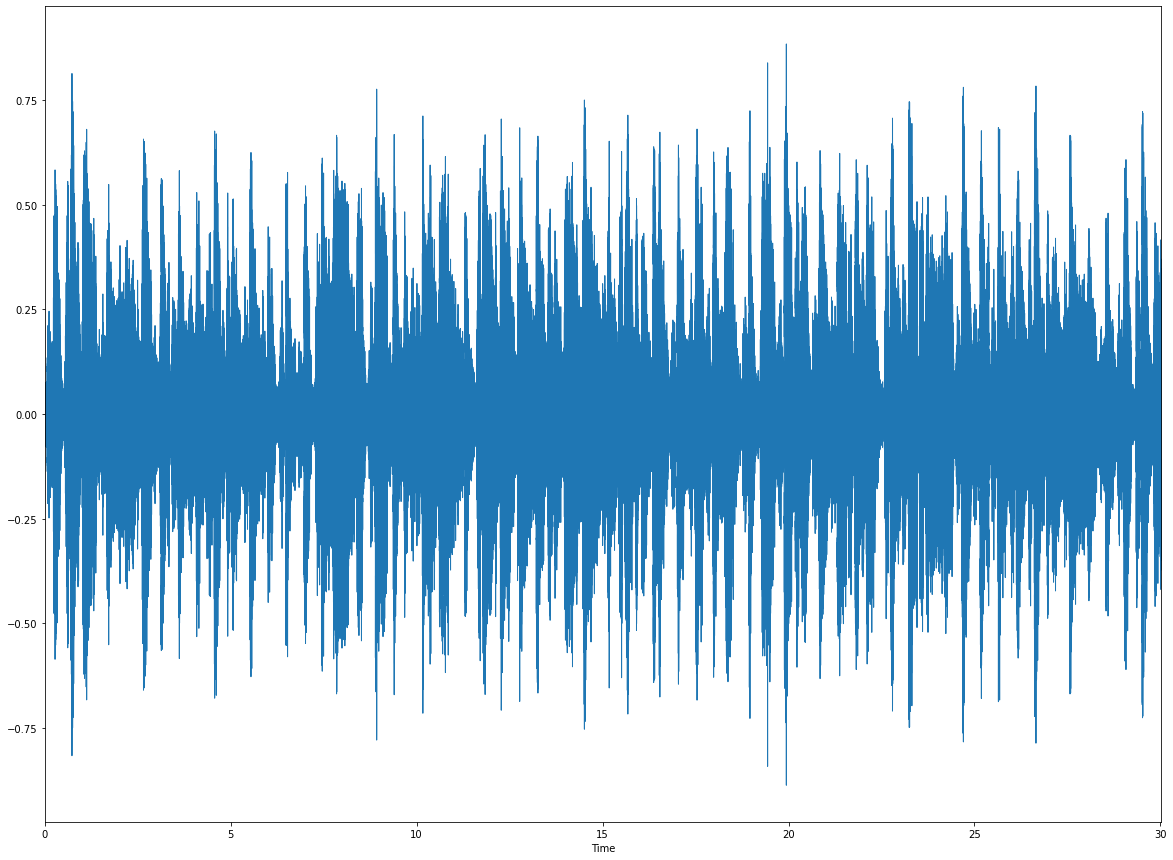

In [ ]:
plt.figure(figsize=(20,15))
librosa.display.waveplot(y =x)

#Time domain
https://zone.ni.com/reference/en-XX/help/371419D-01/lvasptconcepts/tsa_basic_stat_analysis/

In [ ]:
print("Properties of Signal")
print("mean:",np.mean(abs(x)))
print("standard deviation:",np.std(x))
print('''
if skewness = 0: normally distributes
   skewness > 0: more weight in left tail 
   skewness < 0: more weight in right tail
''')
print("skewness:", scipy.stats.skew(abs(x)))
print("kurtosis:", scipy.stats.kurtosis(x))

Properties of Signal
mean: 0.10329606
standard deviation: 0.14068843

if skewness = 0: normally distributes
   skewness > 0: more weight in left tail 
   skewness < 0: more weight in right tail

skewness: 1.610171914100647
kurtosis: 1.580551653345628


#Feature PLOTS

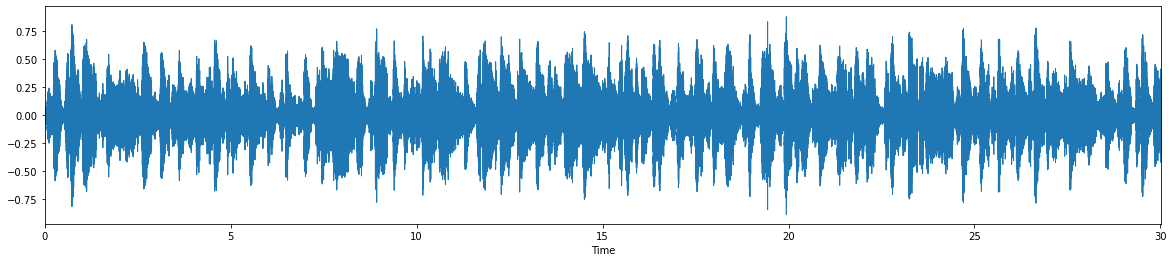

In [ ]:
#waveplot
plt.figure(figsize=(20,4))
librosa.display.waveplot(x)

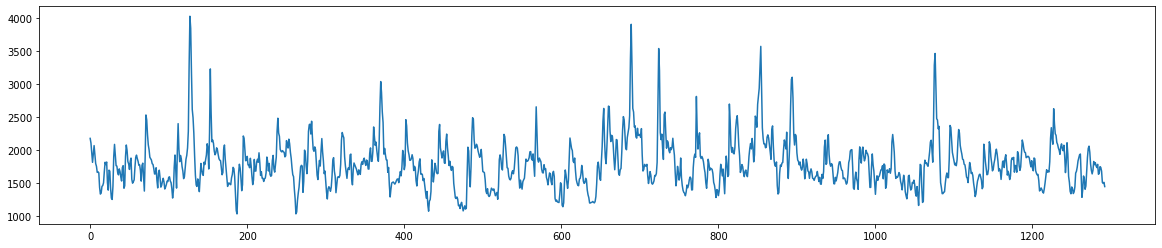

In [ ]:
sc,_,_ =spectral_centroid(x)
plt.figure(figsize=(20,4))
plt.plot(sc)

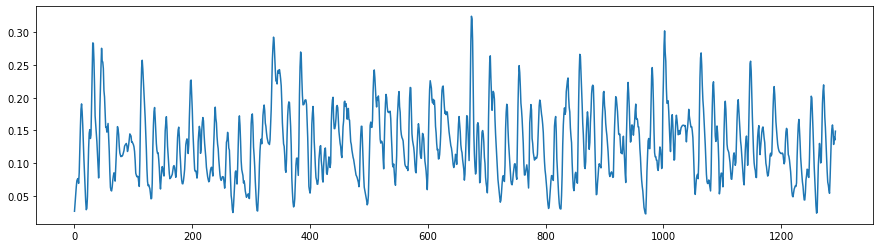

In [ ]:
rms,_,_ = rms_energy(x)
plt.figure(figsize=(15,4))
plt.plot(rms[0])

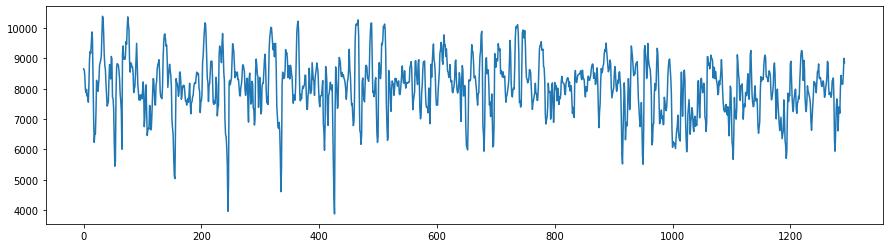

In [ ]:
spec_roll,_,_ = spectral_rolloff(x)
plt.figure(figsize=(15,4))
plt.plot(spec_roll[0])

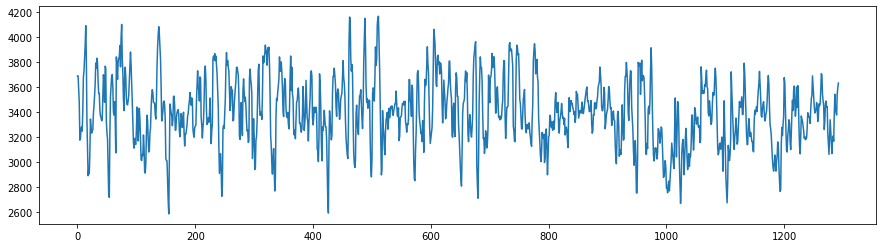

In [ ]:
spec_band,_,_ = spectral_bandwidth(x)
plt.figure(figsize=(15,4))
plt.plot(spec_band[0])


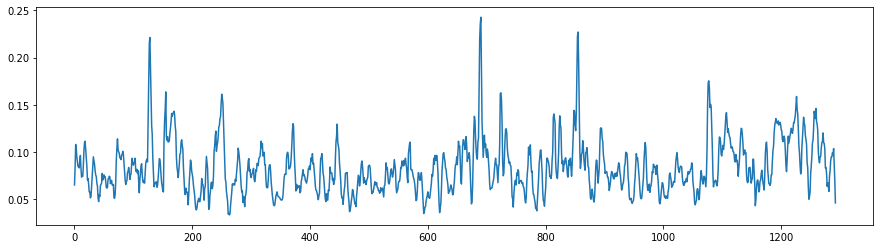

In [ ]:
cross_rate,_,_ = zero_crossing_rate(x)
plt.figure(figsize=(15,4))
plt.plot(cross_rate[0])

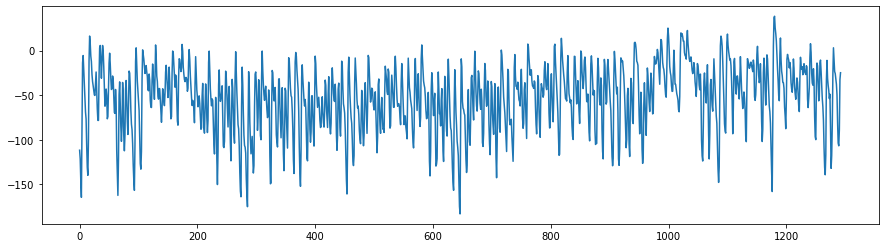

In [ ]:
mfc,_,_ = mfccs(x)
plt.figure(figsize=(15,4))
plt.plot(mfc[0])

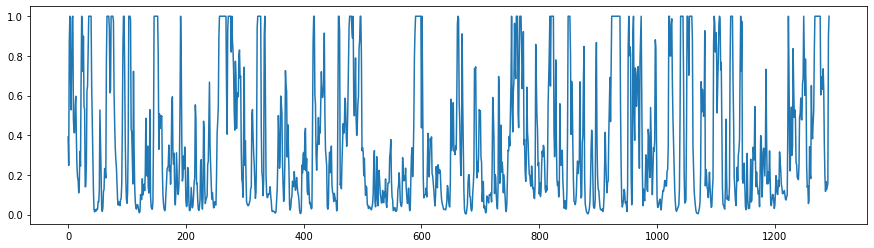

In [ ]:
chroma,_,_ = chroma_features(x)
plt.figure(figsize=(15,4))
plt.plot(chroma[0])

In [ ]:
chroma.shape

(12, 1293)

#correlation analysis 



In [4]:
feature_dataframe = pd.read_csv("/content/feature_dataframe.csv")

In [5]:
feature_dataframe.shape

(1005, 43)

In [6]:
mean_feature_dataframe = pd.read_csv("/content/mean_feature_dataframe.csv")

In [7]:

mean_feature_dataframe = mean_feature_dataframe.loc[:, ~mean_feature_dataframe.columns.str.contains('^Unnamed')]
mean_feature_dataframe.columns

Index(['chroma_stft_mean_0', 'chroma_stft_mean_1', 'chroma_stft_mean_10',
       'chroma_stft_mean_11', 'chroma_stft_mean_2', 'chroma_stft_mean_3',
       'chroma_stft_mean_4', 'chroma_stft_mean_5', 'chroma_stft_mean_6',
       'chroma_stft_mean_7', 'chroma_stft_mean_8', 'chroma_stft_mean_9',
       'chroma_stft_std_0', 'chroma_stft_std_1', 'chroma_stft_std_10',
       'chroma_stft_std_11', 'chroma_stft_std_2', 'chroma_stft_std_3',
       'chroma_stft_std_4', 'chroma_stft_std_5', 'chroma_stft_std_6',
       'chroma_stft_std_7', 'chroma_stft_std_8', 'chroma_stft_std_9',
       'kurtosis', 'mean', 'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13', 'mfcc_mean_14',
       'mfcc_mean_15', 'mfcc_mean_16', 'mfcc_mean_17', 'mfcc_mean_18',
       'mfcc_mean_19', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4',
       'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8',
       'mfcc_mean_9', 'mfcc_std_0', 'mfcc_std_1', 'mfcc_std_10', 'mfcc_std

In [8]:
mean_cols = [c for c in mean_feature_dataframe.columns if 'mean' in c ]
mean_cols_corr = mean_feature_dataframe[mean_cols].corr()

In [9]:
(mean_cols_corr)

,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,mean,mfcc_mean_0,mfcc_mean_1,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,rmse_mean,spectral_bandwidth_mean,spectral_centroid_mean,spectral_rolloff_mean,zero_crossing_rate_mean
chroma_stft_mean_0,1.000000,0.590848,0.403904,0.582291,0.341722,0.321366,0.313047,0.445134,0.332617,0.451643,0.328445,0.262882,0.295975,0.400761,-0.367853,0.113679,0.328154,0.095036,0.303837,0.010074,0.183057,-0.095925,0.056337,-0.049132,0.271952,-0.019729,0.090873,0.040555,0.195645,0.109293,0.259396,0.189048,0.226375,0.307601,0.333858,0.388238,0.379200,0.340624
chroma_stft_mean_1,0.590848,1.000000,0.429751,0.541338,0.633173,0.561398,0.448178,0.337692,0.554844,0.370877,0.559841,0.425119,0.375568,0.493915,-0.469115,0.081503,0.421719,0.022875,0.323646,-0.087241,0.205794,-0.153415,0.134800,-0.060106,0.247471,0.007280,0.161388,0.022631,0.298401,0.084924,0.366922,0.137755,0.319849,0.388475,0.430965,0.489271,0.477478,0.421101
chroma_stft_mean_10,0.403904,0.429751,1.000000,0.623359,0.319663,0.495562,0.289788,0.407174,0.389407,0.304679,0.506090,0.556602,0.341294,0.411623,-0.394914,0.049635,0.302620,0.042239,0.337633,0.009175,0.296428,-0.042566,0.127778,-0.127189,0.084054,0.004590,0.194635,0.038186,0.280052,0.062122,0.332598,0.110911,0.303525,0.351843,0.328309,0.384394,0.380547,0.321579
chroma_stft_mean_11,0.582291,0.541338,0.623359,1.000000,0.399697,0.430050,0.509358,0.308986,0.549851,0.366620,0.451271,0.440160,0.341922,0.447757,-0.441137,0.085002,0.383354,0.040217,0.350301,-0.001043,0.239380,-0.112565,0.125566,-0.100917,0.187758,-0.000518,0.199462,0.038599,0.311561,0.115544,0.359005,0.158372,0.341143,0.353163,0.367652,0.434327,0.423788,0.373730
chroma_stft_mean_2,0.341722,0.633173,0.319663,0.399697,1.000000,0.590845,0.380159,0.245436,0.418816,0.473858,0.300498,0.381004,0.293731,0.427255,-0.363146,0.048197,0.352529,-0.025563,0.260545,-0.110813,0.177796,-0.159206,0.171156,-0.019819,0.183319,-0.058194,0.118449,-0.021488,0.238460,0.017098,0.313599,0.055528,0.267446,0.306993,0.335338,0.406590,0.388515,0.380260
chroma_stft_mean_3,0.321366,0.561398,0.495562,0.430050,0.590845,1.000000,0.612942,0.405550,0.478268,0.408589,0.574680,0.325209,0.398901,0.502322,-0.457995,0.037305,0.442799,-0.081079,0.309356,-0.183893,0.225222,-0.158381,0.201416,-0.056114,0.179031,-0.024604,0.211279,-0.045284,0.337685,0.018624,0.409077,0.053116,0.382806,0.410038,0.404855,0.476308,0.465842,0.418519
chroma_stft_mean_4,0.313047,0.448178,0.289788,0.509358,0.380159,0.612942,1.000000,0.591770,0.549719,0.383718,0.486660,0.514123,0.316500,0.481521,-0.411848,0.046679,0.425377,-0.169091,0.271154,-0.199878,0.234242,-0.179031,0.212426,-0.098448,0.200870,-0.113866,0.267964,-0.048915,0.344396,-0.001992,0.411163,0.020118,0.399293,0.326563,0.335399,0.429728,0.406745,0.424635
chroma_stft_mean_5,0.445134,0.337692,0.407174,0.308986,0.245436,0.405550,0.591770,1.000000,0.603412,0.388625,0.353215,0.281365,0.264409,0.407289,-0.376382,0.053915,0.308330,-0.153387,0.227528,-0.194855,0.179448,-0.158478,0.197208,-0.054614,0.269717,-0.035456,0.188510,-0.055328,0.267967,-0.011738,0.346391,0.013780,0.332412,0.274932,0.307806,0.378341,0.366209,0.361262
chroma_stft_mean_6,0.332617,0.554844,0.389407,0.549851,0.418816,0.478268,0.549719,0.603412,1.000000,0.642054,0.539443,0.380288,0.366552,0.517864,-0.472384,0.042748,0.374819,-0.157241,0.262196,-0.186206,0.201790,-0.156679,0.261875,-0.029048,0.292944,-0.010885,0.184100,-0.018740,0.331584,0.034546,0.405346,0.035409,0.409079,0.377804,0.423625,0.483299,0.476641,0.429037
chroma_stft_mean_7,0.451643,0.370877,0.304679,0.366620,0.473858,0.408589,0.383718,0.388625,0.642054,1.00000

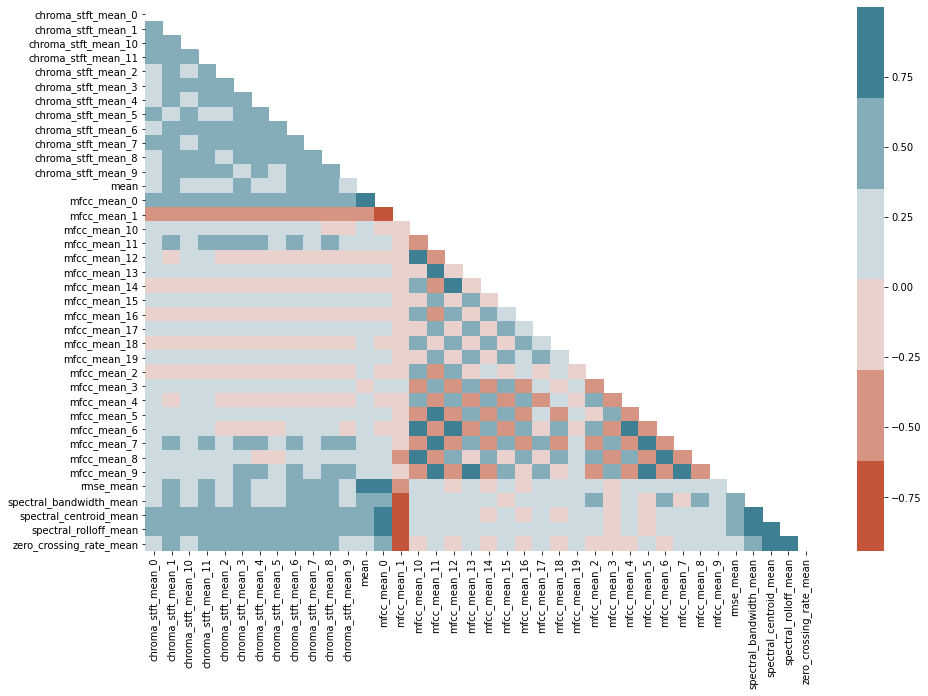

In [10]:
upper_mask = np.triu(np.ones_like(mean_cols_corr,dtype=np.bool))
fig,ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(20, 220, n=6)
sns.heatmap(mean_cols_corr,cmap=cmap,mask=upper_mask)
plt.savefig("mean_cols_corr_heatMap.jpg")

#Normalisation

In [11]:
X = mean_feature_dataframe.drop("name",axis=1
                                )

column = X.columns
minmax_scalar = preprocessing.MinMaxScaler()
scaled_X = minmax_scalar.fit_transform(X)
scaled_data = pd.DataFrame(scaled_X,columns=column)


In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X)
variance_ratio = pca.explained_variance_ratio_

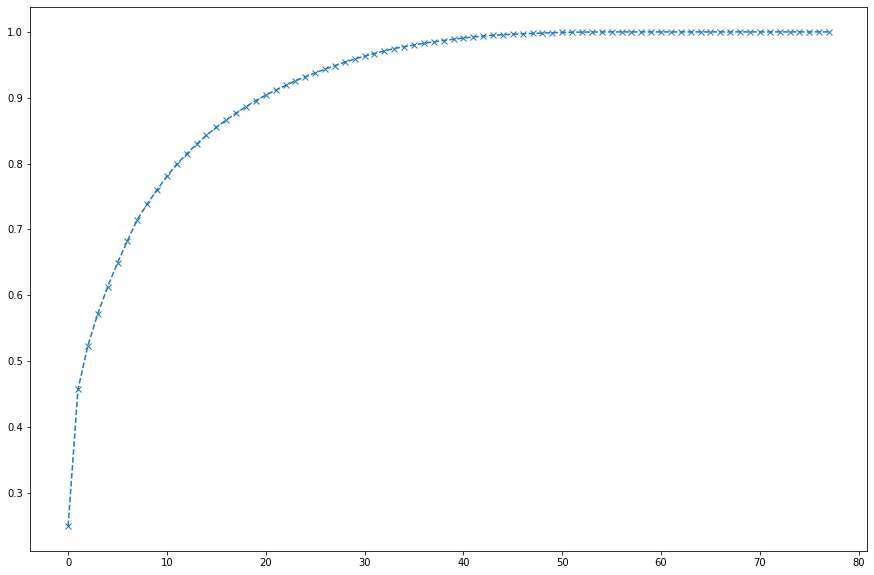

In [68]:
plt.figure(figsize=(15,10))
plt.plot(list(range(78)),variance_ratio.cumsum(),marker="x",linestyle="--")

In [69]:
variance_ratio.cumsum()

array([0.24918769, 0.45676164, 0.52334512, 0.57184599, 0.61272085,
       0.64924741, 0.68266775, 0.71479785, 0.73857593, 0.76006307,
       0.78069494, 0.79915789, 0.81478947, 0.82953876, 0.84303967,
       0.85509732, 0.86627289, 0.8765549 , 0.88650427, 0.89570087,
       0.90410928, 0.91141748, 0.91862613, 0.92563276, 0.93182122,
       0.93773033, 0.94336913, 0.94884054, 0.95406357, 0.95882735,
       0.96320922, 0.96717655, 0.97097138, 0.97468406, 0.97752683,
       0.980182  , 0.98266309, 0.98492705, 0.9869454 , 0.98882017,
       0.99064764, 0.99239442, 0.99376567, 0.99477612, 0.99572891,
       0.99647641, 0.99713077, 0.99771627, 0.99826878, 0.99878024,
       0.99925267, 0.99953694, 0.99970615, 0.99985407, 0.99995115,
       0.99998783, 0.99999689, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

From the array we can see that there is maximum difference uptil 30 principle components, 
Therefore taking n_copmponenets as 30

In [74]:
pca = PCA(n_components=30)
principleComp = pca.fit_transform(scaled_X)


In [72]:
print("Variance retained:",pca.explained_variance_ratio_.cumsum()[-1])

Variance retained: 0.9588263424659966


#Kmeans

In [20]:
!pip install kneed

In [111]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [112]:
within_cluster_dist_sum = []
max_cluster = 20
for i in range(1,max_cluster):
  kmeans_pca = KMeans(i,init="k-means++",random_state=42)
  kmeans_pca.fit(principleComp)
  within_cluster_dist_sum.append(kmeans_pca.inertia_)

In [113]:
cluster = KneeLocator([j for j in range(1,max_cluster)],within_cluster_dist_sum,
                      curve = "convex",direction = "decreasing").knee

In [114]:
print("desired number of clusters from elbow method",cluster)

desired number of clusters from elbow method 4


Text(0, 0.5, 'within_cluster_dist_sum')

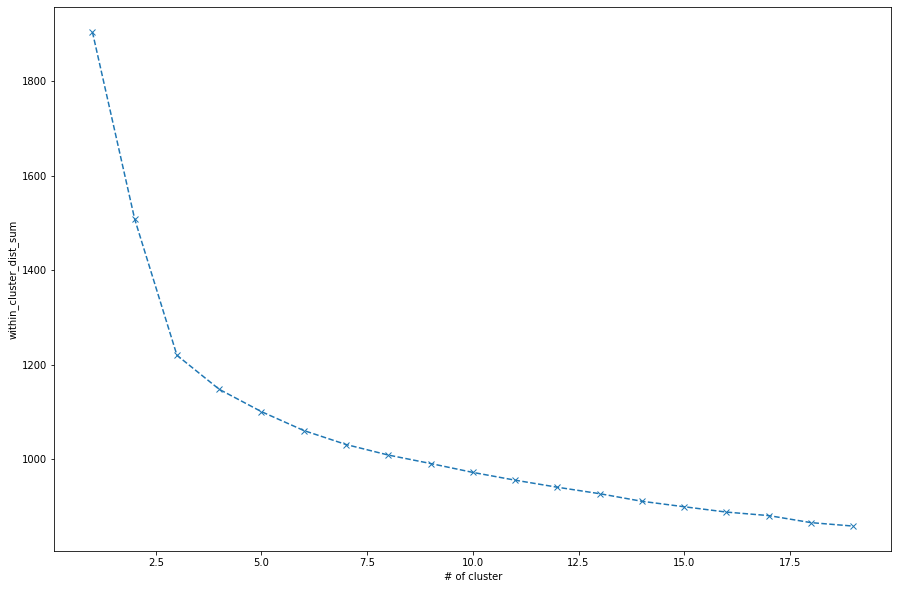

In [115]:
plt.figure(figsize=(15,10))
plt.plot(range(1,20),within_cluster_dist_sum,marker="x",linestyle="--")
plt.xlabel("# of cluster")
plt.ylabel("within_cluster_dist_sum")

In [116]:
kmeans_pca = KMeans(cluster,init="k-means++",random_state=42)
kmeans_pca.fit(principleComp)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [117]:
(kmeans_pca.labels_)

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

In [118]:
 mean_feature_dataframe["cluster_label"]= kmeans_pca.labels_

In [83]:
principleComp_df = pd.DataFrame.from_records(principleComp)


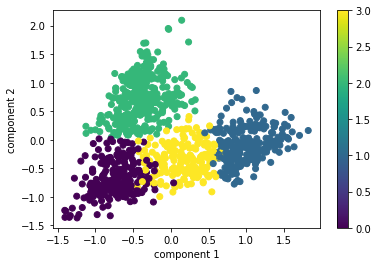

In [84]:
plt.scatter(principleComp[:,0], principleComp[:, 1],c = mean_feature_dataframe["cluster_label"])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Not possible to have visualisation of 30 dimension, just to check the result on 2 dimension which covers more than 95% of variance we see that song are being classified correctly into each cluster.

#DBSCAN

In [63]:
from sklearn.cluster import DBSCAN


array([-0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0.])

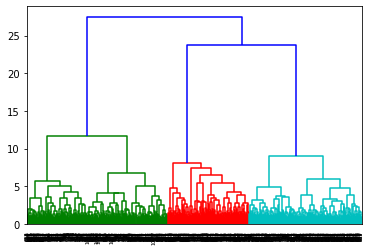

In [91]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure()
ddendogram = dendrogram(linkage(principleComp_df, method='ward'))

In [119]:
dbscan = DBSCAN(eps=115,min_samples=3)
dbscan.fit(principleComp_df)

DBSCAN(algorithm='auto', eps=115, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [120]:
labels = dbscan.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [121]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1
